# FI8090 - Group 5 - Final Project

*   Sonya Fambro
*   Alisha Gupta
*   Wesley Howard
*   Catherine Lennon


In [ ]:
#Install Relevant Packages
!pip install stats
!pip install scipy.stats
!pip install pandas

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd
import statsmodels.tools as tools

from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from mpl_toolkits.mplot3d import Axes3D
from imblearn.under_sampling import RandomUnderSampler

##CSV READERS
#read the QNBT data
churn = pd.read_csv('/content/FinalProject_Efficient.csv')

#read the Experience Correlates Data
ec_df = pd.read_csv('/content/ExperienceCorrelates_2.csv')

#read the Important Features Data
if_df = pd.read_csv('/content/ImportantFeatures.csv')


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement scipy.stats (from versions: none)
ERROR: No matching distribution found for scipy.stats
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# CREATE CLASSES OUT OF CHURN
class_count_0, class_count_1 = ec_df['Churned'].value_counts()

# SEPARATE CHURN CLASSES
class_0 = ec_df[ec_df['Churned'] == 0]
class_1 = ec_df[ec_df['Churned'] == 1]# print the shape of the class
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)

class 0: (55505, 36)
class 1: (1547, 36)


total class of 1 and 0: 0    1547
1    1547
Name: Churned, dtype: int64


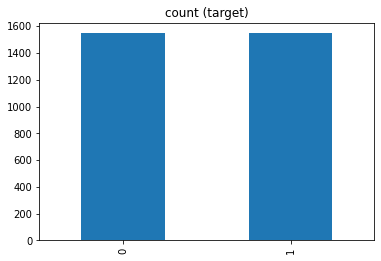

In [ ]:
#UNDERSAMPLING

class_0_under = class_0.sample(class_count_1) #Undersample Class_0 to match Class_1
test_under = pd.concat([class_0_under, class_1], axis=0)

#PRINT RESULT
print("total class of 1 and 0:",test_under['Churned'].value_counts())# plot the count after under-sampeling
test_under['Churned'].value_counts().plot(kind='bar', title='count (target)')

In [ ]:
#VIEW DATATYPES TO ENSURE NO SURPRISES
test_under.dtypes

Churned                            int64
Balance                          float64
Branch_number                      int64
Overdraft_fees_YTD                 int64
Return_fees_YTD                    int64
Overdrafts_Charged_QTD             int64
Overdrafts_Waived_QTD              int64
Service_Charges                  float64
Overdraft_and_Return_Fees          int64
Transaction_Fees                   int64
Type_Code                          int64
Fibonacci_Experience               int64
Experience_Based_on_Status         int64
Statement_Opt_In                   int64
Gen_Z                              int64
Millennial                         int64
Customer_Exposure                  int64
Credit_Card_Flag                   int64
Number_Days_Past_Due_Loans         int64
Years_as_a_Customer              float64
Number_of_Transactions             int64
Interest_Payment                   int64
Deposits_Count                     int64
Mobile_Deposits_Counts             int64
ACH_Deposits_Cou

In [ ]:
#SUMMARY STAT FOR EACH VARIABLE
#print(test_under.describe())
test_under['Experience_Based_on_Status'].describe()

count    3094.000000
mean       -1.021978
std         0.758294
min        -3.000000
25%        -1.000000
50%        -1.000000
75%        -1.000000
max         3.000000
Name: Experience_Based_on_Status, dtype: float64

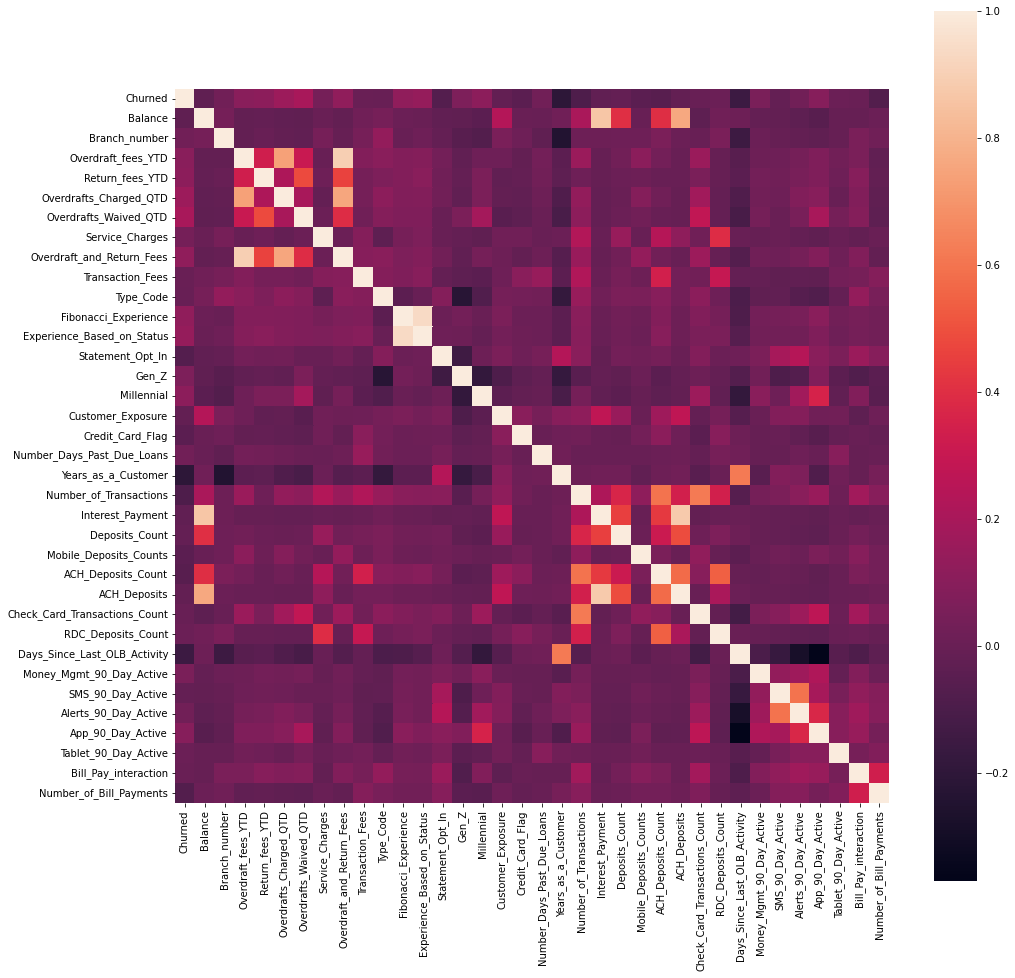

In [ ]:
#HEATMAP OF CORRELATIONS BETWEEN VARIABLES
#Allows us to gain some intuition about what items within the dataset may be related.
plt.figure(figsize=(16,16))
sns.heatmap(test_under.corr(), fmt='.2g', square=True)

In [ ]:
#Create independent and dependent variables.
X=test_under
y=test_under['Churned']

#Split independent and dependent variables into testing and training data.
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=104, test_size=0.25, shuffle=True)

#Print Result
print('X_train : ')
print(X_train.head())
print('')
print('X_test : ')
print(X_test.head())
print('')
print('y_train : ')
print(y_train.head())
print('')
print('y_test : ')
print(y_test.head())

X_train : 
       Churned  Balance  Branch_number  Overdraft_fees_YTD  Return_fees_YTD  \
36705        0   409.06             18                  32                0   
44429        0  1431.92              5                  64                0   
29232        0   547.40              1                  96                0   
8712         0    32.00             10                   0                0   
42938        1    38.00             26                   0                0   

       Overdrafts_Charged_QTD  Overdrafts_Waived_QTD  Service_Charges  \
36705                       1                      0              0.0   
44429                       0                      0              0.0   
29232                       1                      0              0.0   
8712                        0                      0              9.0   
42938                       0                      0              0.0   

       Overdraft_and_Return_Fees  Transaction_Fees  ...  \
36705           

In [ ]:
#LOGISTIC REGRESSION MODEL - ALL VARIABLES

# Create the formula string for all variables
all_columns = ' + '.join(test_under.columns[1:36])
formula = "Churned ~ "+ all_columns
print("Formula: ", formula, "\n")

# Put the training predictors and responses into one DataFrame to be input into the model
trainingdata = pd.DataFrame(X_train)
trainingdata = trainingdata.append(y_train)

# Build the model
log_reg_1 = smf.logit(formula, data=trainingdata).fit()

#Print Model Summary
print(log_reg_1.summary2())

#PSEUDO-R-SQUARED of .126 -- LESS THAN IDEAL BUT DECENT PERFORMANCE OVER NULL (GREAT = .2 to .4)

Formula:  Churned ~ Balance + Branch_number + Overdraft_fees_YTD + Return_fees_YTD + Overdrafts_Charged_QTD + Overdrafts_Waived_QTD + Service_Charges + Overdraft_and_Return_Fees + Transaction_Fees + Type_Code + Fibonacci_Experience + Experience_Based_on_Status + Statement_Opt_In + Gen_Z + Millennial + Customer_Exposure + Credit_Card_Flag + Number_Days_Past_Due_Loans + Years_as_a_Customer + Number_of_Transactions + Interest_Payment + Deposits_Count + Mobile_Deposits_Counts + ACH_Deposits_Count + ACH_Deposits + Check_Card_Transactions_Count + RDC_Deposits_Count + Days_Since_Last_OLB_Activity + Money_Mgmt_90_Day_Active + SMS_90_Day_Active + Alerts_90_Day_Active + App_90_Day_Active + Tablet_90_Day_Active + Bill_Pay_interaction + Number_of_Bill_Payments 

Optimization terminated successfully.
         Current function value: 0.606017
         Iterations 7
                               Results: Logit
Model:                  Logit                Pseudo R-squared:     0.126     
Dependent Var

In [ ]:
#TEST THE ALL-VARIABLE MODEL
from sklearn.metrics import confusion_matrix, accuracy_score

# Predict responses
pred_1 = log_reg_1.predict(X_test)
# round() rounds to nearest integer;
# 0.5 rounds to 0; 0.501 rounds to 1
prediction_1 = list(map(round, pred_1))

# Accuracy score - 66.9%
print('\nTest accuracy = ', accuracy_score(y_test, prediction_1))

# Confusion matrix
cm = confusion_matrix(y_test, prediction_1)
print ("\nConfusion Matrix : \n", cm)

#CHURN RECALL OF 68% -- BETTER THAN RANDOM FOREST.


Test accuracy =  0.6692506459948321

Confusion Matrix : 
 [[264 136]
 [120 254]]


In [ ]:
#LOGISTIC REGRESSION - CHURN & YEARS AS A CUSTOMER

# Create the formula string
formula2 = "Churned ~ Years_as_a_Customer"
print("Formula: ", formula2, "\n")

modified_trainingdata = pd.DataFrame(X_train)
modified_trainingdata = modified_trainingdata.append(y_train)

log_reg_2 = smf.logit(formula2, data=modified_trainingdata).fit()

print(log_reg_2.summary2())

Formula:  Churned ~ Years_as_a_Customer 

Optimization terminated successfully.
         Current function value: 0.673262
         Iterations 5
                          Results: Logit
Model:                Logit            Pseudo R-squared: 0.029     
Dependent Variable:   Churned          AIC:              3127.9371 
Date:                 2022-12-07 19:03 BIC:              3139.4357 
No. Observations:     2320             Log-Likelihood:   -1562.0   
Df Model:             1                LL-Null:          -1608.0   
Df Residuals:         2318             LLR p-value:      8.7802e-22
Converged:            1.0000           Scale:            1.0000    
No. Iterations:       5.0000                                       
-------------------------------------------------------------------
                     Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-------------------------------------------------------------------
Intercept            0.4328   0.0609  7.1041 0.0000  0.3134  0.5522

In [ ]:
#LOGISTIC REGRESSION - CHURN & NUMBER OF TRANSACTIONS

# Create the formula string
formula2 = "Churned ~ Number_of_Transactions"
print("Formula: ", formula2, "\n")

modified_trainingdata = pd.DataFrame(X_train)
modified_trainingdata = modified_trainingdata.append(y_train)

log_reg_2 = smf.logit(formula2, data=modified_trainingdata).fit()

print(log_reg_2.summary2())

Formula:  Churned ~ Number_of_Transactions 

Optimization terminated successfully.
         Current function value: 0.690277
         Iterations 4
                            Results: Logit
Model:                 Logit             Pseudo R-squared:  0.004     
Dependent Variable:    Churned           AIC:               3206.8866 
Date:                  2022-12-07 19:04  BIC:               3218.3852 
No. Observations:      2320              Log-Likelihood:    -1601.4   
Df Model:              1                 LL-Null:           -1608.0   
Df Residuals:          2318              LLR p-value:       0.00030737
Converged:             1.0000            Scale:             1.0000    
No. Iterations:        4.0000                                         
----------------------------------------------------------------------
                        Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
----------------------------------------------------------------------
Intercept               0.101

In [ ]:
#LOGISTIC REGRESSION - CHURN & CREDIT CARD FLAG

# Create the formula string
formula2 = "Churned ~ Credit_Card_Flag"
print("Formula: ", formula2, "\n")

modified_trainingdata = pd.DataFrame(X_train)
modified_trainingdata = modified_trainingdata.append(y_train)

log_reg_2 = smf.logit(formula2, data=modified_trainingdata).fit()

print(log_reg_2.summary2())

Formula:  Churned ~ Credit_Card_Flag 

Optimization terminated successfully.
         Current function value: 0.691947
         Iterations 5
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.002    
Dependent Variable: Churned          AIC:              3214.6353
Date:               2022-12-07 19:05 BIC:              3226.1340
No. Observations:   2320             Log-Likelihood:   -1605.3  
Df Model:           1                LL-Null:          -1608.0  
Df Residuals:       2318             LLR p-value:      0.021619 
Converged:          1.0000           Scale:            1.0000   
No. Iterations:     5.0000                                      
----------------------------------------------------------------
                  Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
----------------------------------------------------------------
Intercept         0.0332   0.0418  0.7940 0.4272 -0.0487  0.1151
Credit_Card_Flag -0.8805   0.4006 -2.19

In [ ]:
#LOGISTIC REGRESSION - CHURN & NUMBER OF BILL PAYMENTS

# Create the formula string
formula2 = "Churned ~ Number_of_Bill_Payments"
print("Formula: ", formula2, "\n")

modified_trainingdata = pd.DataFrame(X_train)
modified_trainingdata = modified_trainingdata.append(y_train)

log_reg_2 = smf.logit(formula2, data=modified_trainingdata).fit()

print(log_reg_2.summary2())

Formula:  Churned ~ Number_of_Bill_Payments 

Optimization terminated successfully.
         Current function value: 0.689693
         Iterations 5
                            Results: Logit
Model:                Logit              Pseudo R-squared:   0.005     
Dependent Variable:   Churned            AIC:                3204.1753 
Date:                 2022-12-07 19:05   BIC:                3215.6739 
No. Observations:     2320               Log-Likelihood:     -1600.1   
Df Model:             1                  LL-Null:            -1608.0   
Df Residuals:         2318               LLR p-value:        7.2815e-05
Converged:            1.0000             Scale:              1.0000    
No. Iterations:       5.0000                                           
-----------------------------------------------------------------------
                         Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------------
Intercept        

In [ ]:
#LOGISTIC REGRESSION - CHURN & ALL "EXPOSURE" VARIABLES

# Create the formula string
formula2 = "Churned ~ Years_as_a_Customer + Number_of_Transactions + Credit_Card_Flag + Number_of_Bill_Payments"
print("Formula: ", formula2, "\n")

modified_trainingdata = pd.DataFrame(X_train)
modified_trainingdata = modified_trainingdata.append(y_train)

log_reg_2 = smf.logit(formula2, data=modified_trainingdata).fit()

print(log_reg_2.summary2())

Formula:  Churned ~ Years_as_a_Customer + Number_of_Transactions + Credit_Card_Flag + Number_of_Bill_Payments 

Optimization terminated successfully.
         Current function value: 0.667069
         Iterations 5
                            Results: Logit
Model:                Logit              Pseudo R-squared:   0.038     
Dependent Variable:   Churned            AIC:                3105.2007 
Date:                 2022-12-07 19:08   BIC:                3133.9473 
No. Observations:     2320               Log-Likelihood:     -1547.6   
Df Model:             4                  LL-Null:            -1608.0   
Df Residuals:         2315               LLR p-value:        3.7656e-25
Converged:            1.0000             Scale:              1.0000    
No. Iterations:       5.0000                                           
-----------------------------------------------------------------------
                         Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------

In [ ]:
#LOGISTIC REGRESSION MODEL PERFORMANCE - CHURN & ALL "EXPOSURE" VARIABLES

# Predict responses
pred_2 = log_reg_2.predict(X_test)
# round() rounds to nearest integer;
# 0.5 rounds to 0; 0.501 rounds to 1
prediction_2 = list(map(round, pred_2))

# Accuracy score - 60.85%
print('\nTest accuracy = ', accuracy_score(y_test, prediction_2))

# Confusion matrix
cm = confusion_matrix(y_test, prediction_2)
print ("\nConfusion Matrix : \n", cm)


Test accuracy =  0.6085271317829457

Confusion Matrix : 
 [[193 207]
 [ 96 278]]


In [ ]:
#LOGISTIC REGRESSION - CHURN & EXPERIENCE BASED ON STATUS

# Create the formula string
formula3 = "Churned ~ Experience_Based_on_Status"
print("Formula: ", formula3, "\n")

modified_trainingdata = pd.DataFrame(X_train)
modified_trainingdata = modified_trainingdata.append(y_train)

log_reg_3 = smf.logit(formula3, data=modified_trainingdata).fit()

print(log_reg_3.summary2())

Formula:  Churned ~ Experience_Based_on_Status 

Optimization terminated successfully.
         Current function value: 0.680068
         Iterations 5
                            Results: Logit
Model:                 Logit             Pseudo R-squared:  0.019     
Dependent Variable:    Churned           AIC:               3159.5167 
Date:                  2022-12-07 19:23  BIC:               3171.0153 
No. Observations:      2320              Log-Likelihood:    -1577.8   
Df Model:              1                 LL-Null:           -1608.0   
Df Residuals:          2318              LLR p-value:       7.7616e-15
Converged:             1.0000            Scale:             1.0000    
No. Iterations:        5.0000                                         
----------------------------------------------------------------------
                           Coef.  Std.Err.   z    P>|z|  [0.025 0.975]
----------------------------------------------------------------------
Intercept                

In [ ]:
#LOGISTIC REGRESSION - CHURN & OVERDRAFTS CHARGED QTD

# Create the formula string
formula3 = "Churned ~ Overdrafts_Charged_QTD"
print("Formula: ", formula3, "\n")

modified_trainingdata = pd.DataFrame(X_train)
modified_trainingdata = modified_trainingdata.append(y_train)

log_reg_3 = smf.logit(formula3, data=modified_trainingdata).fit()

print(log_reg_3.summary2())

Formula:  Churned ~ Overdrafts_Charged_QTD 

Optimization terminated successfully.
         Current function value: 0.678866
         Iterations 6
                           Results: Logit
Model:                Logit             Pseudo R-squared:  0.021     
Dependent Variable:   Churned           AIC:               3153.9363 
Date:                 2022-12-07 19:38  BIC:               3165.4349 
No. Observations:     2320              Log-Likelihood:    -1575.0   
Df Model:             1                 LL-Null:           -1608.0   
Df Residuals:         2318              LLR p-value:       4.5662e-16
Converged:            1.0000            Scale:             1.0000    
No. Iterations:       6.0000                                         
---------------------------------------------------------------------
                        Coef.  Std.Err.    z    P>|z|   [0.025 0.975]
---------------------------------------------------------------------
Intercept              -0.0782   0.0436 -

In [ ]:
#LOGISTIC REGRESSION - CHURN & MILLENNIAL AGE

# Create the formula string
formula3 = "Churned ~ Millennial"
print("Formula: ", formula3, "\n")

modified_trainingdata = pd.DataFrame(X_train)
modified_trainingdata = modified_trainingdata.append(y_train)

log_reg_3 = smf.logit(formula3, data=modified_trainingdata).fit()

print(log_reg_3.summary2())

Formula:  Churned ~ Millennial 

Optimization terminated successfully.
         Current function value: 0.686244
         Iterations 4
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.010     
Dependent Variable: Churned          AIC:              3188.1710 
Date:               2022-12-07 19:38 BIC:              3199.6697 
No. Observations:   2320             Log-Likelihood:   -1592.1   
Df Model:           1                LL-Null:          -1608.0   
Df Residuals:       2318             LLR p-value:      1.7621e-08
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     4.0000                                       
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
Intercept     -0.1092    0.0477  -2.2872  0.0222  -0.2028  -0.0156
Millennial     0.5520    0.09

In [ ]:
#LOGISTIC REGRESSION - CHURN & NEGATIVE EXPERIENCE VARIABLES

# Create the formula string
formula3 = "Churned ~ Experience_Based_on_Status + Overdrafts_Charged_QTD + Millennial"
print("Formula: ", formula3, "\n")

modified_trainingdata = pd.DataFrame(X_train)
modified_trainingdata = modified_trainingdata.append(y_train)

log_reg_3 = smf.logit(formula3, data=modified_trainingdata).fit()

print(log_reg_3.summary2())

Formula:  Churned ~ Experience_Based_on_Status + Overdrafts_Charged_QTD + Millennial 

Optimization terminated successfully.
         Current function value: 0.661666
         Iterations 6
                            Results: Logit
Model:                 Logit             Pseudo R-squared:  0.045     
Dependent Variable:    Churned           AIC:               3078.1311 
Date:                  2022-12-07 19:38  BIC:               3101.1283 
No. Observations:      2320              Log-Likelihood:    -1535.1   
Df Model:              3                 LL-Null:           -1608.0   
Df Residuals:          2316              LLR p-value:       2.1424e-31
Converged:             1.0000            Scale:             1.0000    
No. Iterations:        6.0000                                         
----------------------------------------------------------------------
                           Coef.  Std.Err.   z    P>|z|  [0.025 0.975]
----------------------------------------------------------

In [ ]:
#LOGISTIC REGRESSION MODEL PERFORMANCE - CHURN & NEGATIVE EXPERIENCE VARIABLES

# Predict responses
pred_3 = log_reg_3.predict(X_test)
# round() rounds to nearest integer;
# 0.5 rounds to 0; 0.501 rounds to 1
prediction_3 = list(map(round, pred_3))

# Accuracy score
print('\nTest accuracy = ', accuracy_score(y_test, prediction_3))

# Confusion matrix
cm = confusion_matrix(y_test, prediction_3)
print ("\nConfusion Matrix : \n", cm)


Test accuracy =  0.6111111111111112

Confusion Matrix : 
 [[310  90]
 [211 163]]


In [ ]:
#LOGISTIC REGRESSION MODEL - CHURN & COMBINED NEGATIVE EXPERIENCE & EXPOSURE VARIABLES

# Create the formula string
formula3 = "Churned ~ Experience_Based_on_Status + Overdrafts_Charged_QTD + Millennial + Years_as_a_Customer + Number_of_Transactions + Credit_Card_Flag + Number_of_Bill_Payments"
print("Formula: ", formula3, "\n")

modified_trainingdata = pd.DataFrame(X_train)
modified_trainingdata = modified_trainingdata.append(y_train)

log_reg_3 = smf.logit(formula3, data=modified_trainingdata).fit()

print(log_reg_3.summary2())

Formula:  Churned ~ Experience_Based_on_Status + Overdrafts_Charged_QTD + Millennial + Years_as_a_Customer + Number_of_Transactions + Credit_Card_Flag + Number_of_Bill_Payments 

Optimization terminated successfully.
         Current function value: 0.636554
         Iterations 6
                              Results: Logit
Model:                 Logit               Pseudo R-squared:    0.082     
Dependent Variable:    Churned             AIC:                 2969.6087 
Date:                  2022-12-07 20:26    BIC:                 3015.6033 
No. Observations:      2320                Log-Likelihood:      -1476.8   
Df Model:              7                   LL-Null:             -1608.0   
Df Residuals:          2312                LLR p-value:         6.6500e-53
Converged:             1.0000              Scale:               1.0000    
No. Iterations:        6.0000                                             
--------------------------------------------------------------------------

In [ ]:
#LOGISTIC REGRESSION MODEL PERFORMANCE - CHURN & COMBINED NEGATIVE EXPERIENCE & EXPOSURE VARIABLES

# Predict responses
pred_3 = log_reg_3.predict(X_test)
# round() rounds to nearest integer;
# 0.5 rounds to 0; 0.501 rounds to 1
prediction_3 = list(map(round, pred_3))

# Accuracy score
print('\nTest accuracy = ', accuracy_score(y_test, prediction_3))

# Confusion matrix
cm = confusion_matrix(y_test, prediction_3)
print ("\nConfusion Matrix : \n", cm)


Test accuracy =  0.6268174474959612

Confusion Matrix : 
 [[181 148]
 [ 83 207]]


# LASSO Using Negative Experience and Exposure Variables

In [ ]:
#CREATE NEW VARIABLES
y = test_under['Churned']
X = test_under[['Experience_Based_on_Status','Overdrafts_Charged_QTD','Millennial','Years_as_a_Customer','Number_of_Transactions','Credit_Card_Flag','Number_of_Bill_Payments']]

#GENERATE ALPHAS
alphas = 10**np.linspace(10,-2,100)*0.5
alphas

array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+07, 1.07721735e+07, 8.14875417e+06,
       6.16423370e+06, 4.66301673e+06, 3.52740116e+06, 2.66834962e+06,
       2.01850863e+06, 1.52692775e+06, 1.15506485e+06, 8.73764200e+05,
       6.60970574e+05, 5.00000000e+05, 3.78231664e+05, 2.86118383e+05,
       2.16438064e+05, 1.63727458e+05, 1.23853818e+05, 9.36908711e+04,
       7.08737081e+04, 5.36133611e+04, 4.05565415e+04, 3.06795364e+04,
       2.32079442e+04, 1.75559587e+04, 1.32804389e+04, 1.00461650e+04,
       7.59955541e+03, 5.74878498e+03, 4.34874501e+03, 3.28966612e+03,
       2.48851178e+03, 1.88246790e+03, 1.42401793e+03, 1.07721735e+03,
      

In [ ]:
lasso = Lasso(normalize = True)
coefs = []

for a in alphas:
    lasso.set_params(alpha = a)
    lasso.fit(X, y)
    coefs.append(lasso.coef_)

np.shape(coefs)

Text(0, 0.5, 'weights')

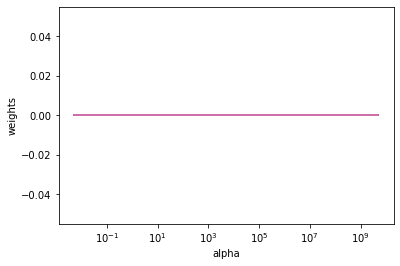

In [ ]:
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

In [ ]:
# Split data into training and test sets
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)

#RUN LASSO
lasso2 = Lasso(alpha = .0005, normalize = True)
lasso2.fit(X_train, y_train)             # Fit a lasso regression on the training data
pred2 = lasso2.predict(X_test)           # Use this model to predict the test data
print(pd.Series(lasso2.coef_, index = X.columns)) # Print coefficients
print(mean_squared_error(y_test, pred2))          # Calculate the test MSE

Experience_Based_on_Status    0.050980
Overdrafts_Charged_QTD        0.031566
Millennial                    0.058807
Years_as_a_Customer          -0.009342
Number_of_Transactions       -0.000797
Credit_Card_Flag             -0.131387
Number_of_Bill_Payments      -0.007593
dtype: float64
0.22507514800224226


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


In [ ]:
#CROSS VALIDATION
lassocv = LassoCV(alphas = alphas, cv = 10, max_iter = 100000, normalize = True)
lassocv.fit(X_train, y_train)
print(lassocv.alpha_) # the best lambda (alpha)

lasso4 = Lasso(alpha = lassocv.alpha_, normalize = True) # using the best lambda (alpha)
lasso4.fit(X_train, y_train)
mean_squared_error(y_test, lasso4.predict(X_test))

5000000000.0


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from skle

0.2500379197972262

In [ ]:
#RE-RUN LASSO WITH CROSS-VALIDATED ALPHA
lasso4.fit(X, y)
# Some of the coefficients are now reduced to exactly zero.

coef =pd.Series(lasso4.coef_, index=X.columns)
print(coef)

print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")
##ALL COEFFICIENTS ARE REDUCED TO ZERO

Experience_Based_on_Status    0.0
Overdrafts_Charged_QTD        0.0
Millennial                    0.0
Years_as_a_Customer          -0.0
Number_of_Transactions       -0.0
Credit_Card_Flag             -0.0
Number_of_Bill_Payments      -0.0
dtype: float64
Lasso picked 0 variables and eliminated the other 7 variables


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


# Random Forest Model

DecisionTreeClassifier(max_depth=2, max_features='auto', random_state=635314245)


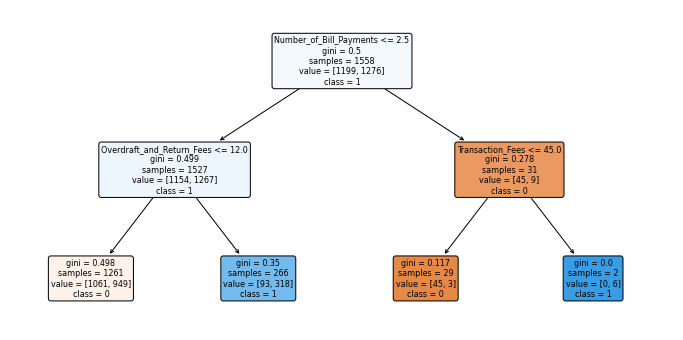

DecisionTreeClassifier(max_depth=2, max_features='auto', random_state=534042305)


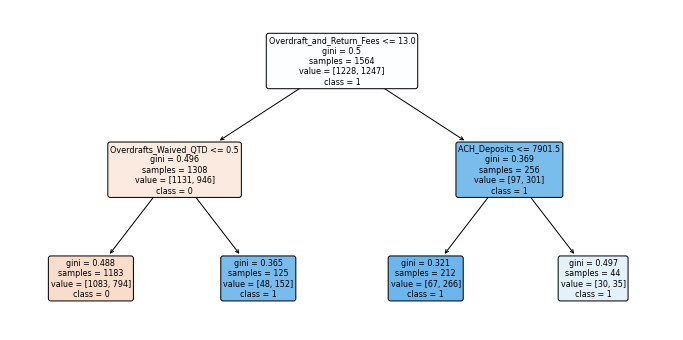

DecisionTreeClassifier(max_depth=2, max_features='auto', random_state=980533977)


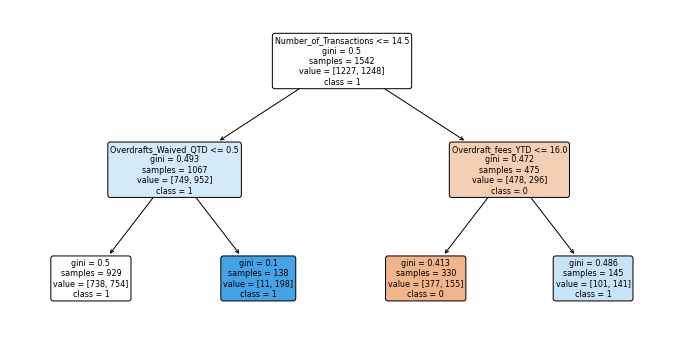

DecisionTreeClassifier(max_depth=2, max_features='auto',
                       random_state=1214051579)


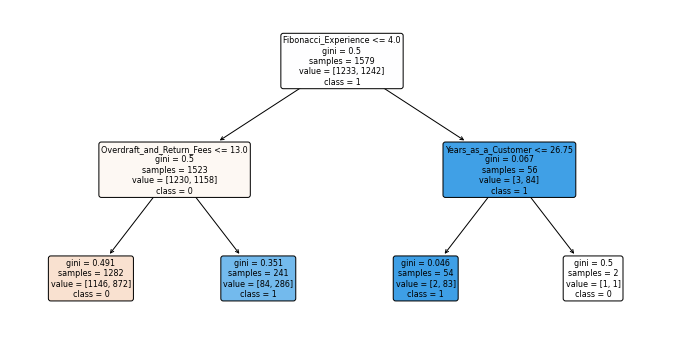

DecisionTreeClassifier(max_depth=2, max_features='auto',
                       random_state=1320673934)


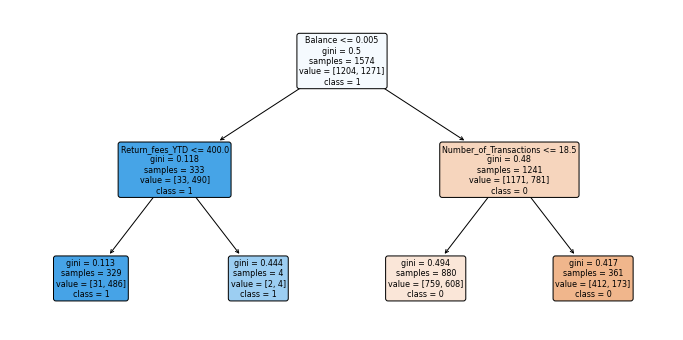

DecisionTreeClassifier(max_depth=2, max_features='auto',
                       random_state=1844615334)


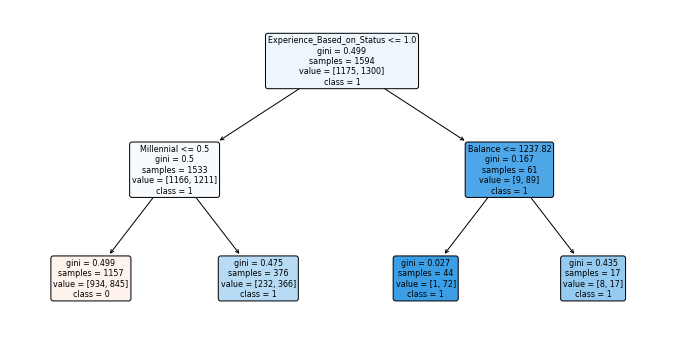

DecisionTreeClassifier(max_depth=2, max_features='auto',
                       random_state=1281938559)


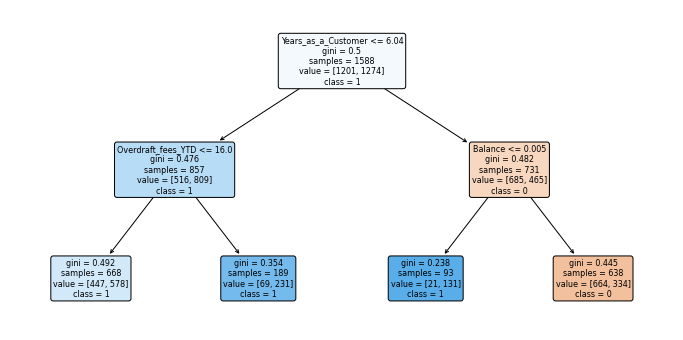

DecisionTreeClassifier(max_depth=2, max_features='auto',
                       random_state=1695456984)


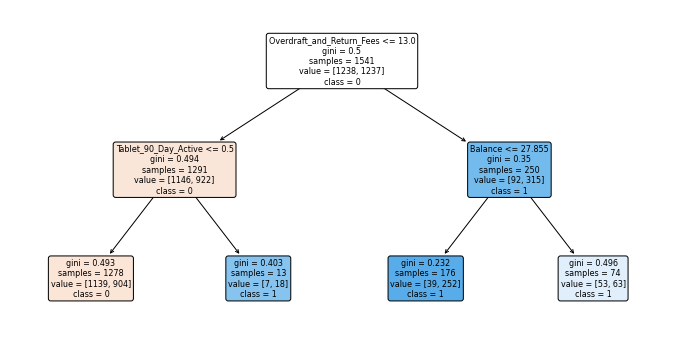

In [ ]:
from sklearn.ensemble import RandomForestClassifier

#SEED NUMBER
SEED = 104

y = test_under['Churned']
X = test_under.drop(['Churned'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

rfc = RandomForestClassifier(n_estimators=8, max_depth=2, random_state=104)

# Fit RandomForestClassifier
rfc.fit(X_train, y_train)
# Predict the test set labels
y_pred = rfc.predict(X_test)

# Import `tree` module
from sklearn import tree

features = X.columns.values # The name of each column
classes = ['0', '1'] # The name of each class

for estimator in rfc.estimators_:
    print(estimator)
    plt.figure(figsize=(12,6))
    tree.plot_tree(estimator, feature_names=features, class_names=classes, fontsize=8, filled=True, rounded=True)
    plt.show()


              precision    recall  f1-score   support

           0       0.69      0.89      0.78       329
           1       0.81      0.54      0.65       290

    accuracy                           0.73       619
   macro avg       0.75      0.72      0.71       619
weighted avg       0.75      0.73      0.72       619



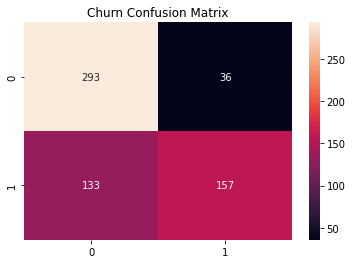

In [ ]:
#CONFUSION MATRIX
from sklearn.metrics import classification_report, confusion_matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d').set_title('Churn Confusion Matrix')

print(classification_report(y_test,y_pred))
#ACCURACY OF 73%, BUT CHURN RECALL OF 54%

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
#Mean Absolute Error (MAE):
#when we subtract the predicted values from the actual values,
#obtaining the errors, sum the absolute values of those errors and get their mean.
#This metric gives a notion of the overall error for each prediction of the model,
#the smaller (closer to 0) the better.
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
#Mean Squared Error (MSE): it is similar to the MAE metric, but it squares the absolute values of the errors.
#Also, as with MAE, the smaller, or closer to 0, the better.
#The MSE value is squared so as to make large errors even larger.
#One thing to pay close attention to, it that it is usually a hard metric to interpret due to the size
#of its values and of the fact that they aren't in the same scale of the data.
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))
#Root Mean Squared Error (RMSE): tries to solve the interpretation problem
#raised with the MSE by getting the square root of its final value, so as to scale it
#back to the same units of the data. It is easier to interpret and good when we need to
#display or show the actual value of the data with the error. It shows how much the data
#may vary, so, if we have an RMSE of 4.35, our model can make an error either because it
#added 4.35 to the actual value, or needed 4.35 to get to the actual value.
#The closer to 0, the better as well.

Mean Absolute Error: 0.27948303715670436
Mean Squared Error: 0.27948303715670436
Root Mean Squared Error: 0.5286615525614704


[[]]

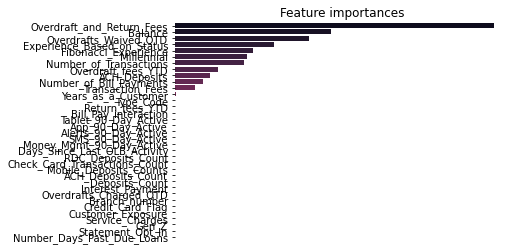

In [ ]:
# Organizing feature names and importances in a DataFrame
features_df = pd.DataFrame({'features': rfc.feature_names_in_, 'importances': rfc.feature_importances_ })

# Sorting data from highest to lowest
features_df_sorted = features_df.sort_values(by='importances', ascending=False)

# Barplot of the result without borders and axis lines
g = sns.barplot(data=features_df_sorted, x='importances', y ='features', palette="rocket")
sns.despine(bottom = True, left = True)
g.set_title('Feature importances')
g.set(xlabel=None)
g.set(ylabel=None)
g.set(xticks=[])
#for value in g.containers:
    #g.bar_label(value, padding=2)

In [ ]:
# class count
class_count_0, class_count_1 = if_df['Churned'].value_counts()

# Separate class
class_0 = if_df[if_df['Churned'] == 0]
class_1 = if_df[if_df['Churned'] == 1]# print the shape of the class
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)

class 0: (55505, 10)
class 1: (1547, 10)


total class of 1 and 0: 0    1547
1    1547
Name: Churned, dtype: int64


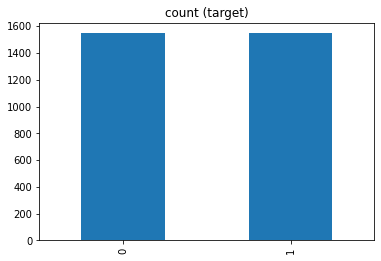

In [ ]:
class_0_under = class_0.sample(class_count_1)

test_under_2 = pd.concat([class_0_under, class_1], axis=0)

print("total class of 1 and 0:",test_under_2['Churned'].value_counts())# plot the count after under-sampeling
test_under_2['Churned'].value_counts().plot(kind='bar', title='count (target)')

In [ ]:
SEED = 104

y = test_under_2['Churned']
X = test_under_2.drop(['Churned'], axis=1) # You can either include risk level or drop it here

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

DecisionTreeClassifier(max_depth=2, max_features='auto', random_state=635314245)


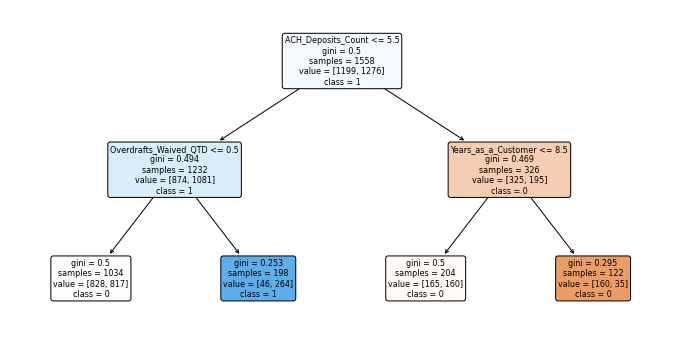

DecisionTreeClassifier(max_depth=2, max_features='auto', random_state=534042305)


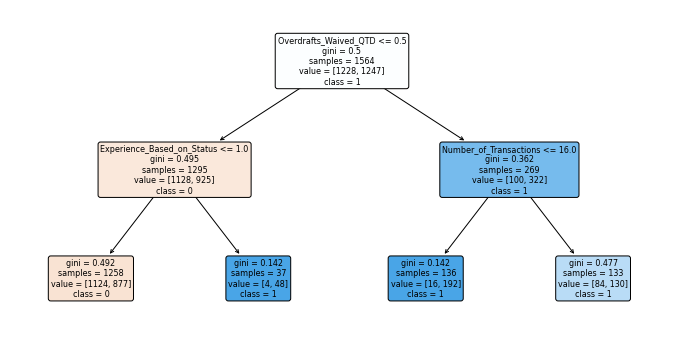

DecisionTreeClassifier(max_depth=2, max_features='auto', random_state=980533977)


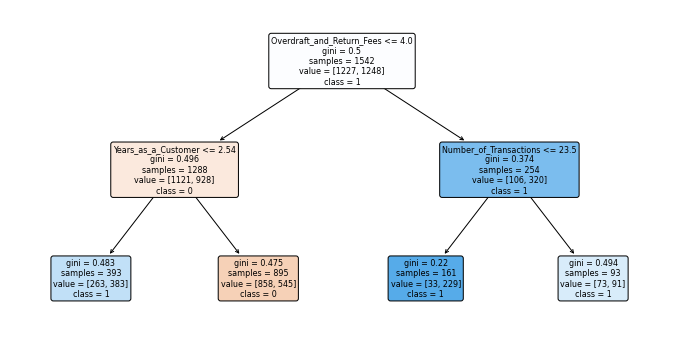

DecisionTreeClassifier(max_depth=2, max_features='auto',
                       random_state=1214051579)


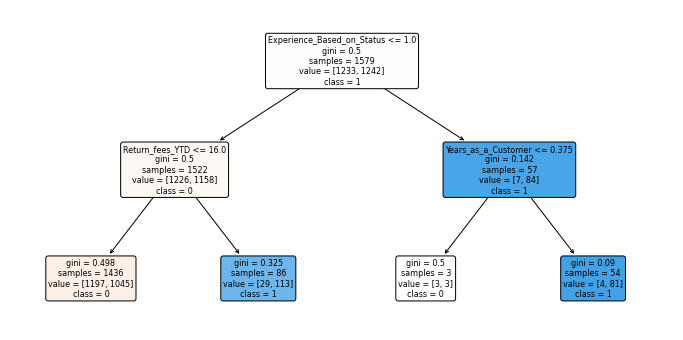

DecisionTreeClassifier(max_depth=2, max_features='auto',
                       random_state=1320673934)


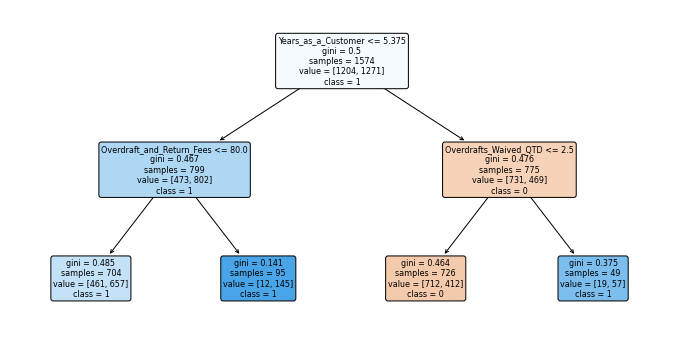

DecisionTreeClassifier(max_depth=2, max_features='auto',
                       random_state=1844615334)


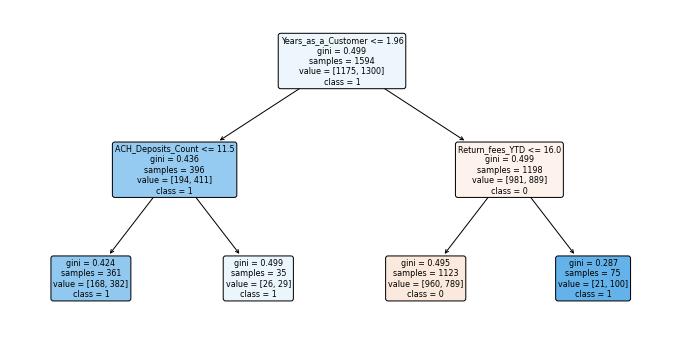

DecisionTreeClassifier(max_depth=2, max_features='auto',
                       random_state=1281938559)


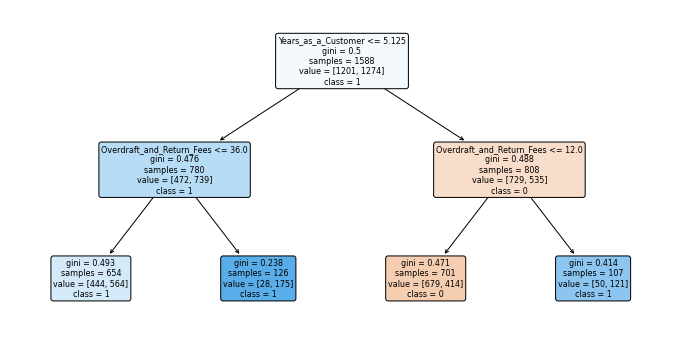

DecisionTreeClassifier(max_depth=2, max_features='auto',
                       random_state=1695456984)


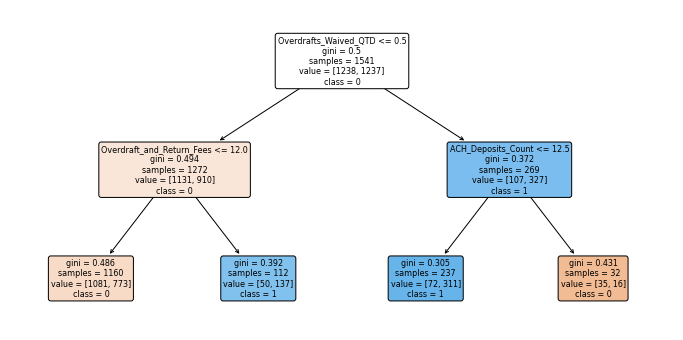

DecisionTreeClassifier(max_depth=2, max_features='auto', random_state=797604360)


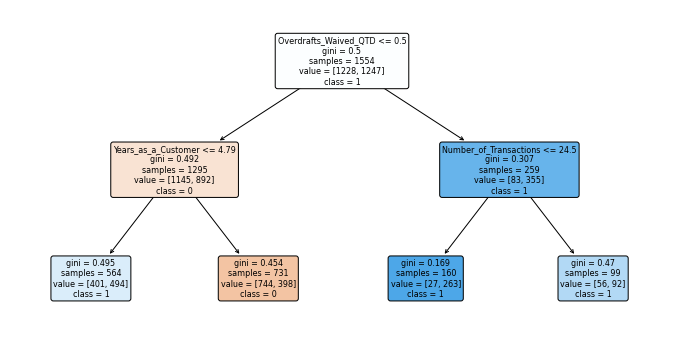

In [ ]:
rfc = RandomForestClassifier(n_estimators=9, max_depth=2, random_state=104)

# Fit RandomForestClassifier
rfc.fit(X_train, y_train)
# Predict the test set labels
y_pred = rfc.predict(X_test)

# Import `tree` module
from sklearn import tree

features = X.columns.values # The name of each column
classes = ['0', '1'] # The name of each class

for estimator in rfc.estimators_:
    print(estimator)
    plt.figure(figsize=(12,6))
    tree.plot_tree(estimator, feature_names=features, class_names=classes, fontsize=8, filled=True, rounded=True)
    plt.show()

              precision    recall  f1-score   support

           0       0.68      0.70      0.69       329
           1       0.65      0.62      0.64       290

    accuracy                           0.66       619
   macro avg       0.66      0.66      0.66       619
weighted avg       0.66      0.66      0.66       619



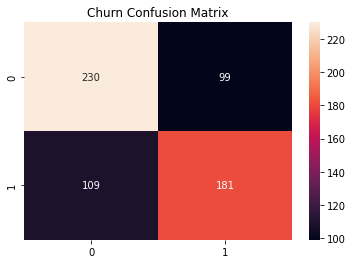

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d').set_title('Churn Confusion Matrix')

print(classification_report(y_test,y_pred))

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
#Mean Absolute Error (MAE):
#when we subtract the predicted values from the actual values,
#obtaining the errors, sum the absolute values of those errors and get their mean.
#This metric gives a notion of the overall error for each prediction of the model,
#the smaller (closer to 0) the better.
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
#Mean Squared Error (MSE): it is similar to the MAE metric, but it squares the absolute values of the errors.
#Also, as with MAE, the smaller, or closer to 0, the better.
#The MSE value is squared so as to make large errors even larger.
#One thing to pay close attention to, it that it is usually a hard metric to interpret due to the size
#of its values and of the fact that they aren't in the same scale of the data.
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))
#Root Mean Squared Error (RMSE): tries to solve the interpretation problem
#raised with the MSE by getting the square root of its final value, so as to scale it
#back to the same units of the data. It is easier to interpret and good when we need to
#display or show the actual value of the data with the error. It shows how much the data
#may vary, so, if we have an RMSE of 4.35, our model can make an error either because it
#added 4.35 to the actual value, or needed 4.35 to get to the actual value.
#The closer to 0, the better as well.

Mean Absolute Error: 0.026728595215143282
Mean Squared Error: 0.026728595215143282
Root Mean Squared Error: 0.16348882290585887
